In [5]:
!pip3 install nltk --user;
!pip3 install bs4;
!pip3 install scipy;
!pip3 install sklearn;
!pip3 install pandas;
!pip3 install requests;
!pip3 install nltk;
!pip3 install seaborn;

UnboundLocalError: local variable 'child' referenced before assignment

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage
import re
import numpy as np
from matplotlib import pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize


# sklearn imports
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import NMF
from sklearn.cluster import DBSCAN
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MeanShift
from sklearn.cluster import SpectralClustering
from sklearn.cluster import OPTICS
from sklearn.cluster import Birch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import MiniBatchKMeans

# adaboost imports
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score

# LogisticRegression
from sklearn.linear_model import LogisticRegression

# Tree imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.tree import export_text

from tqdm import tqdm
from alive_progress import alive_bar

# import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:

def get_keywords(post):
    """Get the keywords from a post"""
    # Get the keywords from the post
    keywords = set()
    for word in re.split("\W+", post.text):
        if word in keywords:
            continue
        else:
            keywords.add(word)
    return keywords


# define the stop words list
stop_words = set(stopwords.words("english"))

# Remove Punctuation
def remove_punctuation(text):
    """Remove punctuation from a string"""
    return ''.join(ch for ch in text if ch not in stop_words)

# Lower Case
def lowercase(text):
    """Lower case a string"""
    return text.lower()



In [ ]:
# opening the scraped data saved in csv files and creating a dataframe for each
df_ocd = pd.read_csv('../data/ocd_thread.csv')
df_autism = pd.read_csv('../data/autism_thread.csv')

# creating a target column for each dataframe
df_ocd['target'] = 1
df_autism['target'] = 0

/var/folders/34/d1tlq3k91hb0lj6x90xpzb4r0000gn/T/ipykernel_51534/972057233.py:2: DtypeWarning: Columns (5,27,50,51,53,54,56,57,60,61,63,67,68,75,76,77,80,81,82,83,84,85,87,88,89,90,91) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ocd = pd.read_csv('../data/ocd_thread.csv')
/var/folders/34/d1tlq3k91hb0lj6x90xpzb4r0000gn/T/ipykernel_51534/972057233.py:3: DtypeWarning: Columns (70,71,74,75,76,77,78,79,80,82,83,84,85,86,87,88) have mixed types. Specify dtype option on import or set low_memory=False.
  df_autism = pd.read_csv('../data/autism_thread.csv')


# Cleaning up the data

In [ ]:
# drop columns with more than 50% missing values from the dataframes
print(f'Dimensions before dropping columns with more than 50% missing values: {df_ocd.shape} for OCD and {df_autism.shape} for Autism')
df_ocd = df_ocd.dropna(thresh=0.5*len(df_ocd), axis=1)
df_autism = df_autism.dropna(thresh=0.5*len(df_autism), axis=1)
print(f'Dimensions after dropping columns with more than 50% missing values: {df_ocd.shape} for OCD and {df_autism.shape} for Autism')

Dimensions before dropping columns with more than 50% missing values: (41449, 93) for OCD and (25750, 90) for Autism
Dimensions after dropping columns with more than 50% missing values: (41449, 51) for OCD and (25750, 52) for Autism


In [ ]:
print(f'columns in df_ocd: {df_ocd.columns}')


columns in df_ocd: Index(['author', 'author_flair_richtext', 'author_flair_type', 'can_mod_post',
       'contest_mode', 'created_utc', 'domain', 'full_link', 'id',
       'is_crosspostable', 'is_reddit_media_domain', 'is_self', 'is_video',
       'link_flair_richtext', 'link_flair_text_color', 'link_flair_type',
       'locked', 'num_comments', 'num_crossposts', 'over_18',
       'parent_whitelist_status', 'permalink', 'pinned', 'retrieved_on',
       'score', 'selftext', 'spoiler', 'stickied', 'subreddit', 'subreddit_id',
       'subreddit_type', 'thumbnail', 'title', 'url', 'whitelist_status',
       'send_replies', 'no_follow', 'subreddit_subscribers',
       'is_original_content', 'pwls', 'wls', 'media_only', 'is_meta',
       'author_fullname', 'gildings', 'is_robot_indexable',
       'author_patreon_flair', 'all_awardings', 'total_awards_received',
       'allow_live_comments', 'target'],
      dtype='object')


In [ ]:
#* Only keep the columns in these two dataframes that are in both dataframes and are in the lists below
autism_columns_to_keep = ['author', 'author_flair_richtext', 'author_flair_type','created_utc', 'id', 'is_video', 'selftext', 'title', 'is_original_content','media_only', 'author_fullname','target']
ocd_columns_to_keep = ['author', 'author_flair_richtext', 'author_flair_type','created_utc', 'id', 'is_video', 'selftext', 'title', 'is_original_content','media_only', 'author_fullname','target']

In [ ]:
# drop columns that are not in the lists above
print(f'Dimensions before dropping columns that are not in the lists above: {df_ocd.shape} for OCD and {df_autism.shape} for Autism')
df_ocd = df_ocd[ocd_columns_to_keep] 
df_autism = df_autism[autism_columns_to_keep]
print(f'Dimensions after dropping columns that are not in the lists above: {df_ocd.shape} for OCD and {df_autism.shape} for Autism')

Dimensions before dropping columns that are not in the lists above: (41449, 51) for OCD and (25750, 52) for Autism
Dimensions after dropping columns that are not in the lists above: (41449, 12) for OCD and (25750, 12) for Autism


In [ ]:
# Now remove any posts from these dataframes where the `is_video` or `media_only` columsn are True
print(f'Dimensions before removing posts where `is_video` or `media_only` columns are True: {df_ocd.shape} for OCD and {df_autism.shape} for Autism')
df_ocd = df_ocd[(df_ocd['is_video'] == False) & (df_ocd['media_only'] == False)]
df_autism = df_autism[(df_autism['is_video'] == False) & (df_autism['media_only'] == False)]
print(f'Dimensions after removing posts where `is_video` or `media_only` columns are True: {df_ocd.shape} for OCD and {df_autism.shape} for Autism')

# and now we can drop the `is_video` and `media_only` columns
df_ocd = df_ocd.drop(columns=['is_video', 'media_only'])
df_autism = df_autism.drop(columns=['is_video', 'media_only'])
print(f'Dropped the `is_video` and `media_only` columns')


Dimensions before removing posts where `is_video` or `media_only` columns are True: (41449, 12) for OCD and (25750, 12) for Autism
Dimensions after removing posts where `is_video` or `media_only` columns are True: (37323, 12) for OCD and (25540, 12) for Autism
Dropped the `is_video` and `media_only` columns


In [ ]:
# some posts are in the title column and some are in the selftext column so we need to combine these columns into one column if they are long enough.
# find the median length of the title and selftext columns combined for each dataframe
med_len_title_selftext_ocd = df_ocd.title.str.len().add(df_ocd.selftext.str.len()).median()
med_len_title_selftext_autism = df_autism.title.str.len().add(df_autism.selftext.str.len()).median()
print(f'Median length of title and selftext columns combined for OCD: {med_len_title_selftext_ocd}')
print(f'Median length of title and selftext columns combined for Autism: {med_len_title_selftext_autism}')


Median length of title and selftext columns combined for OCD: 652.0
Median length of title and selftext columns combined for Autism: 470.0


In [ ]:
# how many posts have a title and selftext combined that are longer than the median length of the title and selftext columns combined for each dataframe?
print(f'Acceptable number of OCD posts: {len(df_ocd[df_ocd.title.str.len().add(df_ocd.selftext.str.len()) > med_len_title_selftext_ocd])}')
print(f'Acceptable number of Autism posts: {len(df_autism[df_autism.title.str.len().add(df_autism.selftext.str.len()) > med_len_title_selftext_autism])}')

Acceptable number of OCD posts: 16343
Acceptable number of Autism posts: 9021


In [ ]:
# remove posts where the title and selftext combined are shorter than the median length of the title and selftext columns combined for each dataframe
print(f'Dimensions before: {df_ocd.shape} for OCD and {df_autism.shape} for Autism')
df_ocd = df_ocd[df_ocd.title.str.len().add(df_ocd.selftext.str.len()) > med_len_title_selftext_ocd]
df_autism = df_autism[df_autism.title.str.len().add(df_autism.selftext.str.len()) > med_len_title_selftext_autism]
print(f'Dimensions before: {df_ocd.shape} for OCD and {df_autism.shape} for Autism')

Dimensions before: (37323, 10) for OCD and (25540, 10) for Autism
Dimensions before: (16343, 10) for OCD and (9021, 10) for Autism


In [ ]:
# drop author_flair_richtext
df_ocd = df_ocd.drop(columns=['author_flair_richtext'])
df_autism = df_autism.drop(columns=['author_flair_richtext'])


In [ ]:
# how many authors are in each dataframe?
print(f'Number of authors in df_ocd: {len(df_ocd.author.unique())}')
print(f'Number of authors in df_autism: {len(df_autism.author.unique())}')


Number of authors in df_ocd: 7688
Number of authors in df_autism: 2897


In [ ]:
# how many posts are there for the top 100 authors in each dataframe?
top_authors_ocd = df_ocd.author.value_counts().head(100)
top_authors_byfullname_ocd = df_ocd.author_fullname.value_counts().head(100)
top_authors_autism = df_autism.author.value_counts().head(100)
top_authors_byfullname_autism = df_autism.author_fullname.value_counts().head(100)

In [ ]:
top_authors_ocd.head(2)

Userur      143
corinaah     44
Name: author, dtype: int64

In [ ]:
top_authors_autism.head(2)

Jupiter642           47
anonaskingaccount    32
Name: author, dtype: int64

In [ ]:
# are there any authors that are in both dataframes?
print(f'Number of authors that are in both dataframes: {len(set(top_authors_ocd.index).intersection(set(top_authors_autism.index)))}')
list_of_cross_posters = list(set(top_authors_ocd.index).intersection(set(top_authors_autism.index)))
print(f'List of authors that are in both dataframes: {list_of_cross_posters}')

Number of authors that are in both dataframes: 0
List of authors that are in both dataframes: []


In [ ]:
# drop author_flair_type and author_fullname columns from both dataframes
df_ocd = df_ocd.drop(columns=['author_flair_type', 'author_fullname'])
df_autism = df_autism.drop(columns=['author_flair_type', 'author_fullname'])


In [ ]:
# combine the title and self text columns into one column with the format `title - selftext`
df_ocd['title_selftext'] = df_ocd.title + ' - ' + df_ocd.selftext
df_autism['title_selftext'] = df_autism.title + ' - ' + df_autism.selftext


In [ ]:
# drop the title and selftext columns
df_ocd = df_ocd.drop(columns=['title', 'selftext'])
df_autism = df_autism.drop(columns=['title', 'selftext'])


In [ ]:
# rename the `title_selftext` column to `selftext`
df_ocd = df_ocd.rename(columns={'title_selftext': 'selftext'})
df_autism = df_autism.rename(columns={'title_selftext': 'selftext'})


In [ ]:
# print the first five selftext posts for each dataframe


## cleaning out the post data (to remove biasing factors)

In [ ]:
cancel_words = ['ocd','aut*','autism','obsess*','compuls*','disorder','diagnosis']

In [ ]:
def censor_words(text):
    text = text.lower()
    # Remove all words that begin with 'aut' from the sentence and return the result
    # regex pattern
    pattern = r'aut(.*?)[^a-zA-Z]' # aut followed by any number of characters then ending in any character that is not a letter
    # replace those pattern matches with '' (nothing)
    text =  re.sub(pattern, '', text) # replace the pattern matches with '' (nothing)
    
    # pattern 2 - remove all words that begin with 'ocd' from the sentence and return the result
    pattern = r'ocd(.*?)[^a-zA-Z]' # ocd followed by any number of characters then ending in any character that is not a letter
    # replace those pattern matches with '' (nothing)
    text =  re.sub(pattern, '', text) # replace the pattern matches with '' (nothing)

    # pattern 3 - remove all words that begin with 'obsess' from the sentence and return the result
    pattern = r'obsess|compuls(.*?)[^a-zA-Z]' # obsess followed by any number of characters then ending in any character that is not a letter
    # replace those pattern matches with '' (nothing)
    text =  re.sub(pattern, '', text) # replace the pattern matches with '' (nothing)
    return text # return the result

# apply the censor_words function to the selftext column of each dataframe
df_ocd['selftext'] = df_ocd['selftext'].apply(censor_words)

# remove punctuation
df_ocd['selftext'] = df_ocd['selftext'].str.replace('[^\w\s]','')
# remove numbers
df_ocd['selftext'] = df_ocd['selftext'].str.replace('\d+', '')
# remove whitespace
df_ocd['selftext'] = df_ocd['selftext'].str.replace('\s+', ' ')

# do the same for the autism dataframe
df_autism['selftext'] = df_autism['selftext'].apply(censor_words)
# remove punctuation
df_autism['selftext'] = df_autism['selftext'].str.replace('[^\w\s]','')
# remove numbers
df_autism['selftext'] = df_autism['selftext'].str.replace('\d+', '')
# remove whitespace
df_autism['selftext'] = df_autism['selftext'].str.replace('\s+', ' ')



/var/folders/34/d1tlq3k91hb0lj6x90xpzb4r0000gn/T/ipykernel_51534/2951519817.py:24: FutureWarning: The default value of regex will change from True to False in a future version.
  df_ocd['selftext'] = df_ocd['selftext'].str.replace('[^\w\s]','')
/var/folders/34/d1tlq3k91hb0lj6x90xpzb4r0000gn/T/ipykernel_51534/2951519817.py:26: FutureWarning: The default value of regex will change from True to False in a future version.
  df_ocd['selftext'] = df_ocd['selftext'].str.replace('\d+', '')
/var/folders/34/d1tlq3k91hb0lj6x90xpzb4r0000gn/T/ipykernel_51534/2951519817.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  df_ocd['selftext'] = df_ocd['selftext'].str.replace('\s+', ' ')
/var/folders/34/d1tlq3k91hb0lj6x90xpzb4r0000gn/T/ipykernel_51534/2951519817.py:33: FutureWarning: The default value of regex will change from True to False in a future version.
  df_autism['selftext'] = df_autism['selftext'].str.replace('[^\w\s]','')
/var/folders/34/d1t

In [ ]:
# remove words from posts that are in the cancel_words list. There are regex patterns in the cancel_words list so we need to use the `regex=True` parameter

# then remove double spaces
df_ocd['selftext'] = df_ocd['selftext'].str.replace('  ', ' ')
df_autism['selftext'] = df_autism['selftext'].str.replace('  ', ' ')

In [ ]:
# make a new dataframe called df_reddit that combines the two dataframes

df_reddit = pd.DataFrame(columns=df_ocd.columns)
# what is the length of the shorter dataframe?
if len(df_ocd) < len(df_autism): # if the OCD dataframe is shorter
    shorter_df = df_ocd # set the shorter dataframe to the OCD dataframe
    longer_df = df_autism # set the longer dataframe to the Autism dataframe
    df_reddit.append()
else: # if the Autism dataframe is shorter
    shorter_df = df_autism
    longer_df = df_ocd

# add the shorter dataframe to the new dataframe using concat
df_reddit = pd.concat([df_reddit, shorter_df], axis=0)
# shorten the longer dataframe to the length of the shorter dataframe
longer_df = longer_df.head(len(shorter_df))
# add the shortened longer dataframe to the new dataframe using concat
df_reddit = pd.concat([df_reddit, longer_df], axis=0)

# reset the index
df_reddit = df_reddit.reset_index(drop=True)

/var/folders/34/d1tlq3k91hb0lj6x90xpzb4r0000gn/T/ipykernel_51534/2826576949.py:18: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_reddit = pd.concat([df_reddit, longer_df], axis=0)


In [ ]:
# shuffle the dataframe
df_reddit = df_reddit.sample(frac=1).reset_index(drop=True)
# check the dimensions of the new dataframe
print(f'Dimensions of the new dataframe: {df_reddit.shape}')
df_reddit.head(5)

Dimensions of the new dataframe: (18042, 6)


,author,created_utc,id,is_original_content,target,selftext
0,ChubbyMonkeyX,1539241532,9n7o85,False,1,really bad but not very endangering ive though...
1,yognzvaidkd,1620336450,n6i6sp,False,1,a lot just happened and idk whats true can som...
2,kiranode,1554270592,b8u505,False,0,first group therapy session still stressed out...
3,b50142,1560436373,c06jok,False,0,participants needed support workers healthcare...
4,AccountForMyOCD,1558730325,bsly2g,False,1,just as i thought i was doing better i encount...


In [ ]:
# double check that the number of posts for each subreddit is the same
print(f'Number of posts for OCD: {len(df_reddit[df_reddit.target == 1])}')
print(f'Number of posts for Autism: {len(df_reddit[df_reddit.target == 0])}')


Number of posts for OCD: 9021
Number of posts for Autism: 9021


# Post Cleaning Preview

In [ ]:
df_ocd.head(2)

,author,created_utc,id,is_original_content,target,selftext
2016,mindkingdom,1527063603,8lhprn,False,1,thoughts that things could get corrupted or br...
2020,SteelSlayer7,1527074859,8lil9v,False,1,intrusive thoughts devaluing myself i am plagu...


In [ ]:
df_autism.head(2)

,author,created_utc,id,is_original_content,target,selftext
0,Equadex,1546777579,ad56om,False,0,how can people be considered equals if they ar...
5,936R,1546786707,ad68am,False,0,questions for females with hi there im looking...


In [ ]:
# find any of the medications in the selftext column that are in the data/drug_info.csv file under the Medication Name column and replace them with ' ' (empty string)
drug_info = pd.read_csv('../data/drug_info.csv')
drug_info['Medication Name'] = drug_info['Medication Name'].str.lower()


In [ ]:
# create a list of the medications
medications = drug_info['Medication Name'].tolist()
print(f'Number of medications: {len(medications)}')

Number of medications: 3047


In [ ]:
# how many posts contain a medication?
print(f'Number of posts that contain a medication: {len(df_reddit[df_reddit.selftext.str.contains("|".join(medications), regex=True)])}')

Number of posts that contain a medication: 18039


In [ ]:
medications[0]

'abacavir sulfate'

In [ ]:
# is 'p' in the medications list?
'p' in medications
# drop the 'p' from the medications list
medications.remove('p')
# drop any medications that are less than 5 characters long
medications = [med for med in medications if len(med) > 5]

In [22]:
# create a list of rows and the medications mentioned in each row
import os
medications_mentioned = []
if os.exists('../data/cleaned_reddit.csv'):
    pass
else:
    with alive_bar (len(df_reddit)) as bar:
        for index, row in df_reddit.iterrows(): # iterate through each row in the dataframe
            # use regex to find all of the medications in the selftext column
            meds = re.findall(r'\b(?:{})\b'.format('|'.join(medications)), row['selftext'])
            if len(meds) > 0: # if there are medications mentioned in the post
                # replace the medications with ' ' (empty string)
                row['selftext'] = re.sub(r'\b(?:{})\b'.format('|'.join(medications)), ' ', row['selftext'])
                medications_mentioned.extend(meds) # add the medications to the medications_mentioned list
                # remove duplicate medications
                medications_mentioned = list(set(medications_mentioned))
            bar()

SyntaxError: 'continue' not properly in loop (2754674244.py, line 5)

In [23]:
# remove the words from the selftext column that are in the medications list
# if the file does not already exist, create it
if os.path.exists('../data/cleaned_reddit.csv'):
    # load the file
    df_reddit = pd.read_csv('../data/cleaned_reddit.csv')
else:
    print('File does not exist. Creating it now. Before meds removed from selftext the length of the dataframe is: ', len(df_reddit))
    print(f' Removed {len(medications_mentioned)} medications from the selftext column')
    # save the dataframe to a csv file
    df_reddit.to_csv('../data/cleaned_reddit.csv', index=False)

In [24]:
# Now we want to clean the text in the self text column
# remove punctuation
df_reddit['selftext'] = df_reddit['selftext'].str.replace('[^\w\s]','')
# remove numbers
df_reddit['selftext'] = df_reddit['selftext'].str.replace('\d+', '')
# remove double spaces
df_reddit['selftext'] = df_reddit['selftext'].str.replace('  ', ' ')
# remove single characters
df_reddit['selftext'] = df_reddit['selftext'].str.replace(r'\b\w\b', '').str.replace(r'\s+', ' ')
# remove newlines
df_reddit['selftext'] = df_reddit['selftext'].str.replace(r'\n', ' ')
# remove urls
df_reddit['selftext'] = df_reddit['selftext'].str.replace(r'http\S+', '')
# remove html tags
df_reddit['selftext'] = df_reddit['selftext'].str.replace(r'<.*?>', '')
# remove extra spaces
df_reddit['selftext'] = df_reddit['selftext'].str.replace(r'\s+', ' ')
# remove extra spaces at the beginning of the string
df_reddit['selftext'] = df_reddit['selftext'].str.replace(r'^\s+', '')
# remove extra spaces at the end of the string
df_reddit['selftext'] = df_reddit['selftext'].str.replace(r'\s+$', '')

In [25]:
# read the file into a dataframe
df_reddit = pd.read_csv('../data/cleaned_reddit.csv')
# remove any rows that have a null value in the selftext column
df_reddit = df_reddit.dropna(subset=['selftext'])
# reset the index
df_reddit = df_reddit.reset_index(drop=True)
# check the dimensions of the dataframe
print(f'Dimensions of the dataframe: {df_reddit.shape}')
df_reddit.head(5)







Dimensions of the dataframe: (18042, 6)


,author,created_utc,id,is_original_content,target,selftext
0,ChubbyMonkeyX,1539241532,9n7o85,False,1,really bad but not very endangering ive though...
1,yognzvaidkd,1620336450,n6i6sp,False,1,a lot just happened and idk whats true can som...
2,kiranode,1554270592,b8u505,False,0,first group therapy session still stressed out...
3,b50142,1560436373,c06jok,False,0,participants needed support workers healthcare...
4,AccountForMyOCD,1558730325,bsly2g,False,1,just as i thought i was doing better i encount...


In [26]:
# Evaluate the model using cross validation
from sklearn.model_selection import cross_val_score

# import auc and roc_curve
from sklearn.metrics import auc, roc_curve

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

import pickle

Training score: 0.9648215209518882
Testing score: 0.9261804477942807
Cross val score: 0.9318257079646288


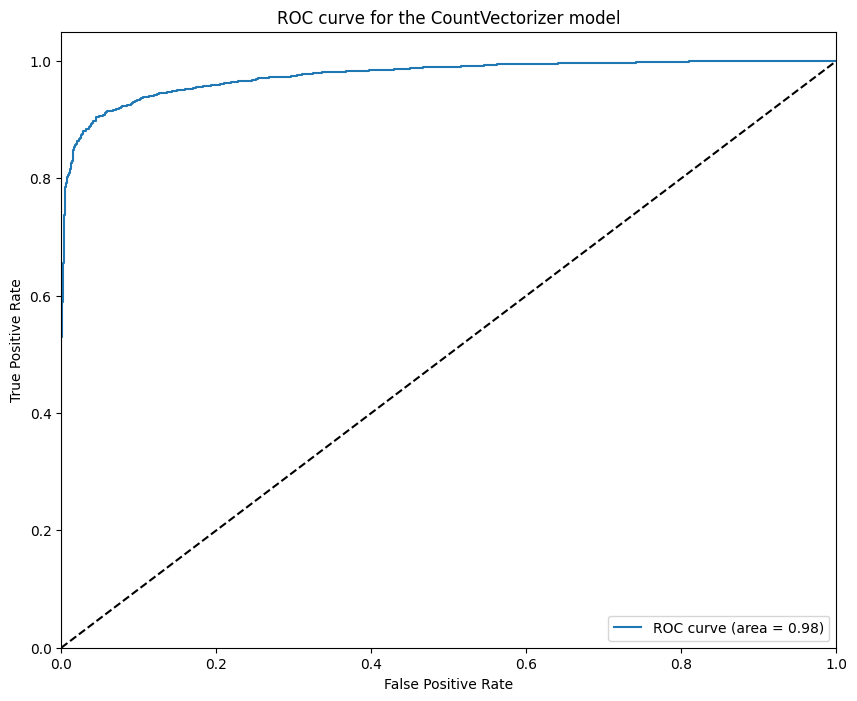

In [27]:
# Instantiate a CountVectorizer object
cvec = CountVectorizer(stop_words='english', max_features=1000)
# Fit the CountVectorizer object to the data
cvec.fit(df_reddit['selftext'])
# Transform the data using the fitted CountVectorizer object
cvec_data = cvec.transform(df_reddit['selftext'])
# Convert the cvec_data to a dataframe
cvec_df = pd.DataFrame(cvec_data.toarray(), columns=cvec.get_feature_names())
# Add the subreddit column to the dataframe
cvec_df['subreddit'] = df_reddit['target']

# use the cvec dataframe in a regression model
# create the X and y variables
X = cvec_df.drop(columns='subreddit')
y = cvec_df['subreddit']
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
# instantiate the model
logreg_cvec = LogisticRegression()
# fit the model
logreg_cvec.fit(X_train, y_train)
# score the model
print(f'Training score: {logreg_cvec.score(X_train, y_train)}')
print(f'Testing score: {logreg_cvec.score(X_test, y_test)}')
print(f'Cross val score: {cross_val_score(logreg_cvec, X, y, cv=5).mean()}')
# ROC curve for the CountVectorizer model
# predict the probabilities
y_pred_proba = logreg_cvec.predict_proba(X_test)[:,1]
# calculate the false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
# calculate the area under the curve
roc_auc = auc(fpr, tpr)
# plot the ROC curve
plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for the CountVectorizer model')
plt.legend(loc="lower right")
# save the model
pickle.dump(logreg_cvec, open('../models/logreg_cvec.pkl', 'wb'))
# save the plot to a file
plt.savefig('../images/roc_curve_cvec.png')
plt.show();

Training score: 0.9427980193629444
Testing score: 0.9272888494790512
Cross val score: 0.926283069733894


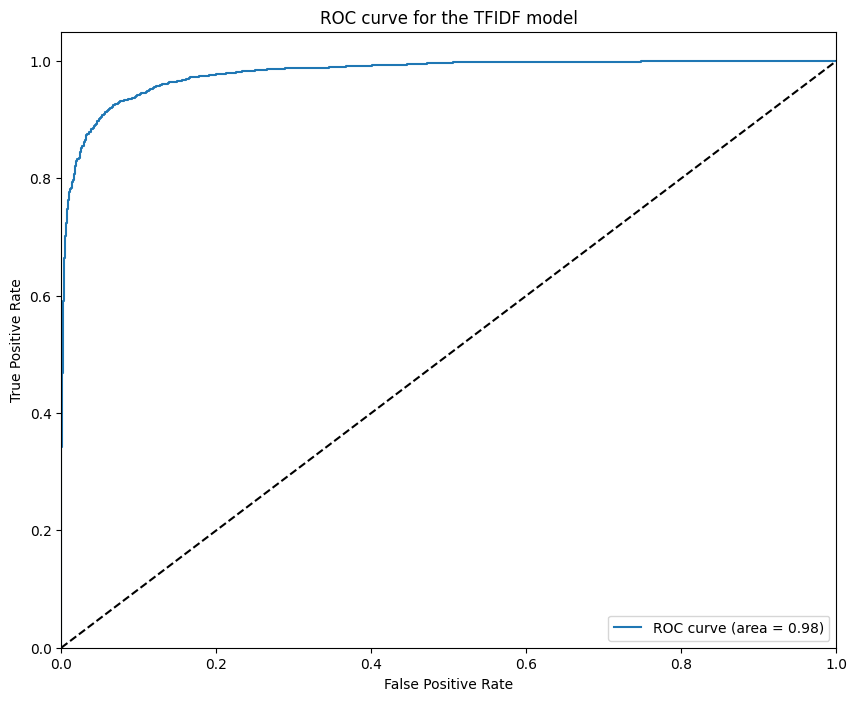

In [28]:
# Instantiate a TfidfVectorizer object
tvec = TfidfVectorizer(stop_words='english', max_features=1000)
# Fit the TfidfVectorizer object to the data
tvec.fit(df_reddit['selftext'])
# Transform the data using the fitted TfidfVectorizer object
tvec_data = tvec.transform(df_reddit['selftext'])
# Convert the tvec_data to a dataframe
tvec_df = pd.DataFrame(tvec_data.toarray(), columns=tvec.get_feature_names())
# Add the subreddit column to the dataframe
tvec_df['subreddit'] = df_reddit['target']

# use the tvec dataframe in a regression model

# create the X and y variables
X = tvec_df.drop(columns='subreddit')
y = tvec_df['subreddit']
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
# instantiate the model
logreg_tfidf = LogisticRegression()
# fit the model
logreg_tfidf.fit(X_train, y_train)
# score the model
print(f'Training score: {logreg_tfidf.score(X_train, y_train)}')
print(f'Testing score: {logreg_tfidf.score(X_test, y_test)}')
print(f'Cross val score: {cross_val_score(logreg_tfidf, X, y, cv=5).mean()}')

# ROC curve for the TFIDF model
# predict the probabilities
y_pred_proba = logreg_tfidf.predict_proba(X_test)[:,1]
# calculate the false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
# calculate the area under the curve
roc_auc = auc(fpr, tpr)
# plot the ROC curve
plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for the TFIDF model')
plt.legend(loc="lower right")
# save the model
pickle.dump(logreg_tfidf, open('../models/logreg_tfidf.pkl', 'wb'))
# save the plot to a file
plt.savefig('../images/roc_curve_tfidf.png')
plt.show();


Training score: 0.889586874584288
Testing score: 0.8882731101751274
Cross val score: 0.8904780884693906


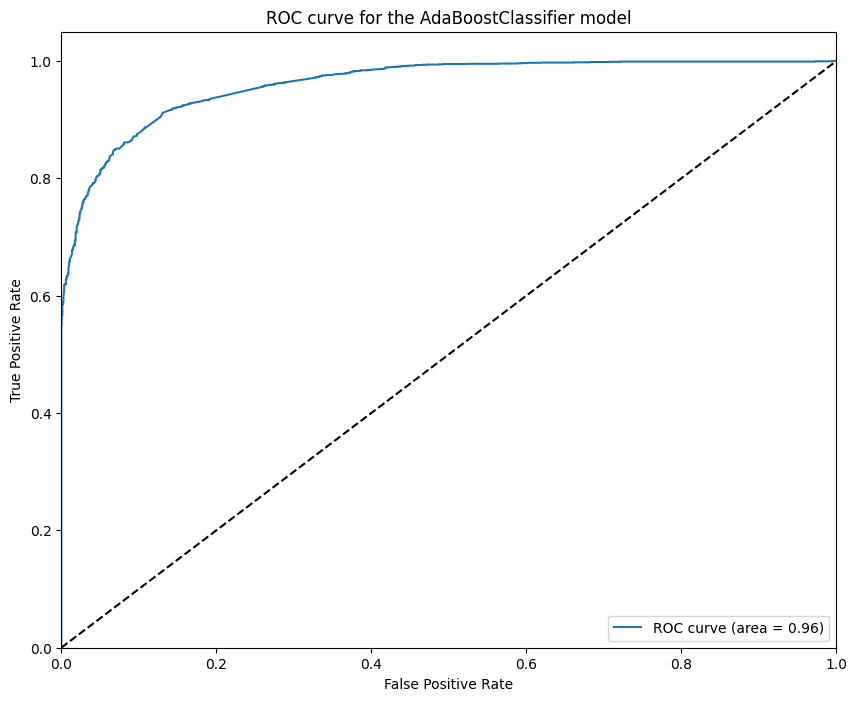

In [29]:
# AdaBoostClassifier
# We will use the CountVectorizer dataframe for this model
# create the X and y variables
X = cvec_df.drop(columns='subreddit')
y = cvec_df['subreddit']
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
# instantiate the model
ada = AdaBoostClassifier()
# fit the model
ada.fit(X_train, y_train)
# score the model
print(f'Training score: {ada.score(X_train, y_train)}')
print(f'Testing score: {ada.score(X_test, y_test)}')
print(f'Cross val score: {cross_val_score(ada, X, y, cv=5).mean()}')
# ROC curve for the AdaBoostClassifier model
# predict the probabilities
y_pred_proba = ada.predict_proba(X_test)[:,1]
# calculate the false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
# calculate the area under the curve
roc_auc = auc(fpr, tpr)
# plot the ROC curve
plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for the AdaBoostClassifier model')
plt.legend(loc="lower right")
# save the model to a pickle file for use
pickle.dump(ada, open('../models/adaboost.pkl', 'wb'))
# save the plot to a png file in the images folder
plt.savefig('../images/adaboost.png')
plt.show();


In [30]:
# GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
# We will use the CountVectorizer dataframe for this model
# create the X and y variables
X = cvec_df.drop(columns='subreddit')
y = cvec_df['subreddit']
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
# instantiate the model
gb = GradientBoostingClassifier()
# fit the model
gb.fit(X_train, y_train)
# score the model
print(f'Training score: {gb.score(X_train, y_train)}')
print(f'Testing score: {gb.score(X_test, y_test)}')
print(f'Cross val score: {cross_val_score(gb, X, y, cv=5).mean()}')
# ROC curve for the GradientBoostingClassifier model
# predict the probabilities
y_pred_proba = gb.predict_proba(X_test)[:,1]
# calculate the false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
# calculate the area under the curve
roc_auc = auc(fpr, tpr)
# plot the ROC curve
plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for the GradientBoostingClassifier model')
plt.legend(loc="lower right")
# save the model to a pickle file for use
pickle.dump(gb, open('../models/gradientboost.pkl', 'wb'))
# save the plot to a png file in the images folder
plt.savefig('../images/gradientboost.png')
plt.show();
